
# IMPORTING LIBRARIES

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import entropy
import statsmodels.api as sm

#ANSWER 1


##(a) PRELIMINARIES

(i) Read data in a dataframe, and display a portion of data

In [ ]:
df=pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [ ]:
df=df.drop(columns='country-year',axis=1)
df.head()
#redundant data removed - EDA

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,15,66,24,900",796,Boomers


(iii) and (iv) printing number of records and variables

In [ ]:
print(f"number of records : {df.shape[0]}") 
#number of records

print(f"number of variables:{df.shape[1]}")
#number of variables

number of records : 27820
number of variables:11


In [ ]:
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].astype('str')
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(",", "")
display(df)

#commas removed from continuous variable types to facilitate numerical operations

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,0.675,63067077179,2309,Generation Z


In [ ]:
df[' gdp_for_year ($) ']=df[' gdp_for_year ($) '].astype('float64')
#explicit type conversion in ambiguous cases

(v) printing data type of each variable


In [ ]:
df.dtypes
#data type of each column

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)     float64
gdp_per_capita ($)      int64
generation             object
dtype: object

(vi) printing number of unique values of each variable

In [ ]:
for cols in df:
  print(f"Number of unique values in column(/variable) {df[cols].name} are - {len(df[cols].unique())}")
#printing number of unique values in each column

Number of unique values in column(/variable) country are - 101
Number of unique values in column(/variable) year are - 32
Number of unique values in column(/variable) sex are - 2
Number of unique values in column(/variable) age are - 6
Number of unique values in column(/variable) suicides_no are - 2084
Number of unique values in column(/variable) population are - 25564
Number of unique values in column(/variable) suicides/100k pop are - 5298
Number of unique values in column(/variable) HDI for year are - 306
Number of unique values in column(/variable)  gdp_for_year ($)  are - 2321
Number of unique values in column(/variable) gdp_per_capita ($) are - 2233
Number of unique values in column(/variable) generation are - 6


(vii) identifying nominal/ordinal .... datatypes using an algorithm

In [ ]:
for col in df:
  if len(df[col].unique())<250 and df[col].dtypes=='object':
    print(f"{df[col].name} is of datatype Nominal/Categorical")
  elif len(df[col].unique())<250 and df[col].dtypes!='object':
    print(f"{df[col].name} is of datatype Ordinal")
  elif df[col].dtype=='datetime64[ns]' or col=='year':
    print(f"{df[col].name} is of datatype temporal")
  elif df[col].dtypes=='int64':
    print(f"{df[col].name} is of datatype native integer(continuous)")
  else:
    print(f"{df[col].name} is of datatype continuous variable, float64")

# loop to automatically determine the datatype depending on number of unique values, data types and time stamp datatypes

country is of datatype Nominal/Categorical
year is of datatype Ordinal
sex is of datatype Nominal/Categorical
age is of datatype Nominal/Categorical
suicides_no is of datatype native integer(continuous)
population is of datatype native integer(continuous)
suicides/100k pop is of datatype continuous variable, float64
HDI for year is of datatype continuous variable, float64
 gdp_for_year ($)  is of datatype continuous variable, float64
gdp_per_capita ($) is of datatype native integer(continuous)
generation is of datatype Nominal/Categorical


(viii) number of missing entries for each variable

In [ ]:
  for col in df:
    print(f"{df[col].name} has {df[col].isnull().sum()} missing entries")
  #loop for printing number of missing variable values

country has 0 missing entries
year has 0 missing entries
sex has 0 missing entries
age has 0 missing entries
suicides_no has 0 missing entries
population has 0 missing entries
suicides/100k pop has 0 missing entries
HDI for year has 19456 missing entries
 gdp_for_year ($)  has 0 missing entries
gdp_per_capita ($) has 0 missing entries
generation has 0 missing entries


(ix) number of recors without any missing entries

In [ ]:
count=0
for i in range(df.shape[0]):
  if df.loc[i].isnull().sum() != 0:
    count=count+1
print("The number of records without any missing entries is- ", count)    
    
#printing number of records with atleast one missing entries

The number of records without any missing entries is-  19456


##(b) DISCRETE VARIABLES

(i) Plotting frequency plots for each discrete variable

Without weights for all discrete variables

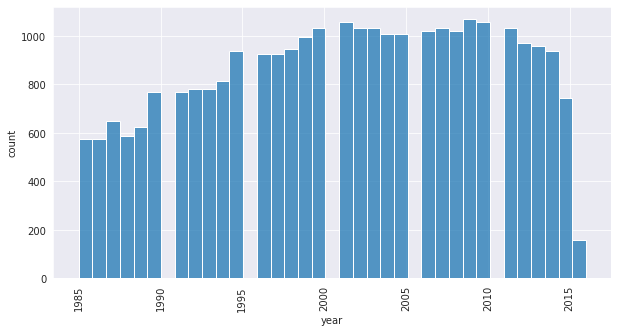

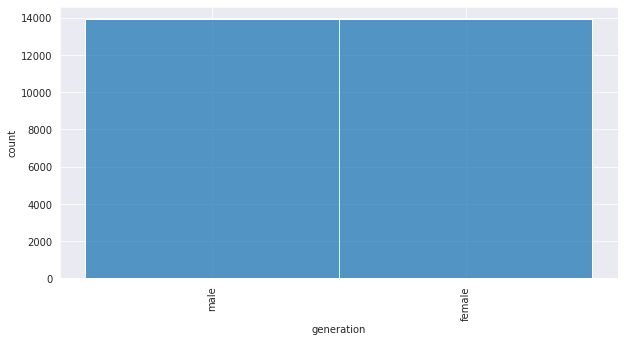

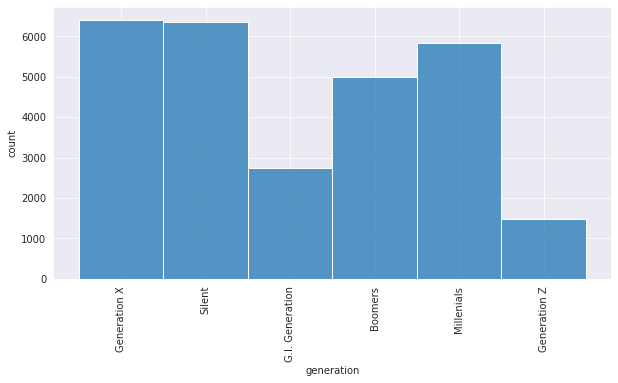

In [ ]:
discretevariableslist=['year', 'sex',  'generation' ]


figs=plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plot=sns.histplot(x='year', data=df)
plt.ylabel('count')
plt.show()

figs=plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plot=sns.histplot(x='sex', data=df, )
plt.xlabel(col)
plt.ylabel('count')
plt.show()

figs=plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plot=sns.histplot(x='generation', data=df)
plt.xlabel(col)
plt.ylabel('count')
plt.show()
#countplot used instead of histplot due to frequencies obseved in discrete variables
#weights assigned to variables for plotting frequencies, or else data representation was misleading of the reality
#EG: male and female varible frequencies are equal, but suicide numbers vary for different genders, hence weights used
#log scale utilised where necessary

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


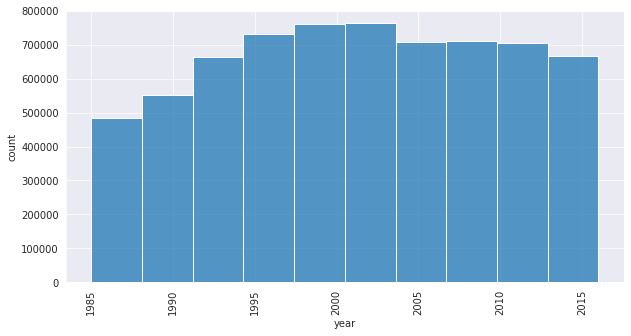

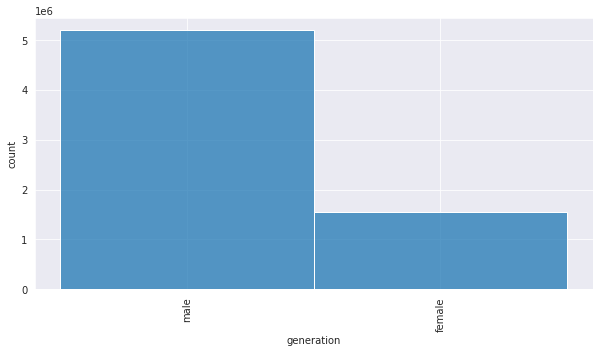

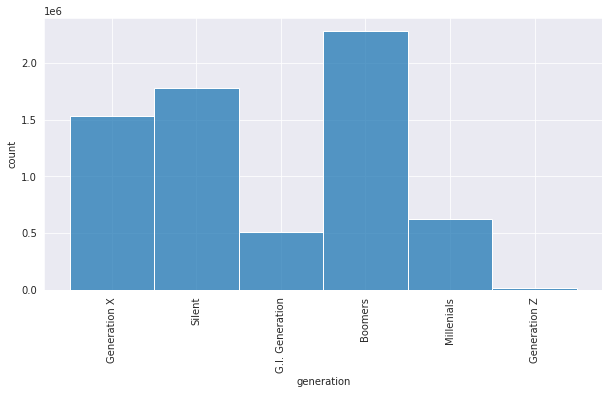

In [ ]:
discretevariableslist=['year', 'sex',  'generation' ]


figs=plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plot=sns.histplot(x='year', data=df, weights='suicides_no',)
plt.ylabel('count')
plt.show()

figs=plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plot=sns.histplot(x='sex', data=df, weights='suicides_no')
plt.xlabel(col)
plt.ylabel('count')
plt.show()

figs=plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plot=sns.histplot(x='generation', data=df, weights='suicides_no')
plt.xlabel(col)
plt.ylabel('count')
plt.show()
#countplot used instead of histplot due to frequencies obseved in discrete variables
#weights assigned to variables for plotting frequencies, or else data representation was misleading of the reality
#EG: male and female varible frequencies are equal, but suicide numbers vary for different genders, hence weights used
#log scale utilised where necessary

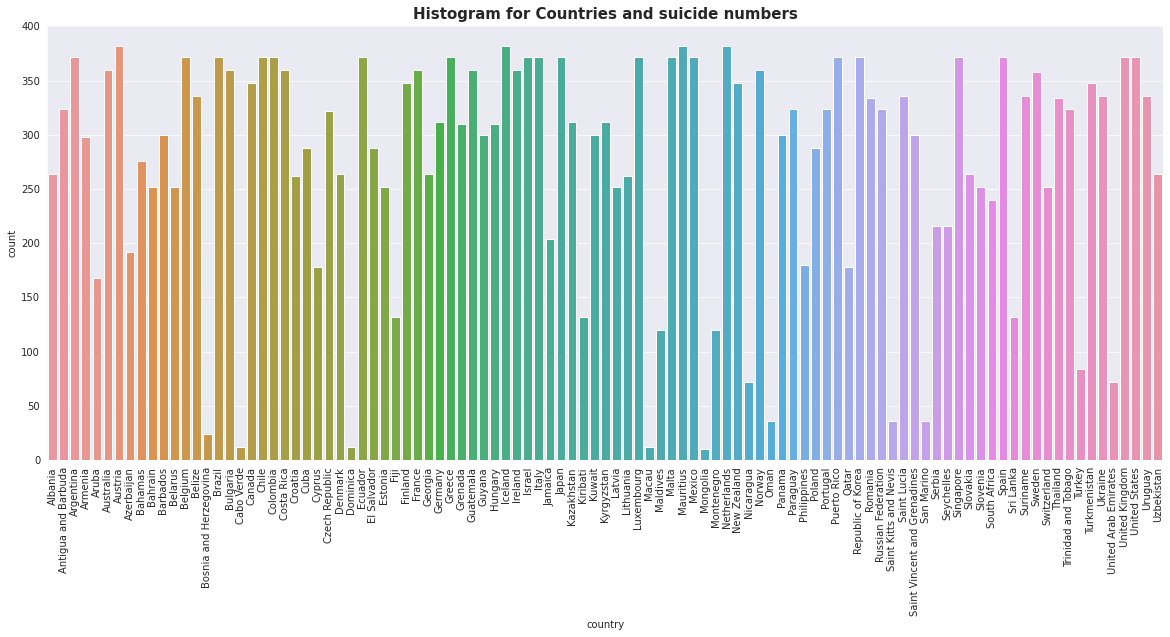

In [ ]:
#another plot for countries, due to more number of unique values
figs=plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)

plot=sns.countplot(x='country', data=df)
plt.xlabel('country')
plt.ylabel('count')
plt.title('Histogram for Countries and suicide numbers', fontsize=15, weight='bold')
plt.show()
#log scale un-utilised for better data representation

In [ ]:
df['year'].mode(dropna=True)
#dropping values with empty record variable entries - data cleaning

0    2009
dtype: int64

In [ ]:
discretevariables=['year', 'sex', 'generation', 'country']
#defining discrete variable list

(ii) Identifying the mode value for each discrete variable

In [ ]:
for i in discretevariables:
  print(f"mode of the discrete variable {df[i].name} is ")
  print( df[i].mode(dropna=True)) #drop not a number nan values
  

mode of the discrete variable year is 
0    2009
dtype: int64
mode of the discrete variable sex is 
0    female
1      male
dtype: object
mode of the discrete variable generation is 
0    Generation X
dtype: object
mode of the discrete variable country is 
0        Austria
1        Iceland
2      Mauritius
3    Netherlands
dtype: object


(iii) Computing Entropy of all discrete variables

In [ ]:
for i in discretevariables:
  req_series=pd.Series(df[i]).value_counts()
  req_entropy= entropy(req_series)
  print(f"Entropy for the variable {df[i].name} is {req_entropy}")

#defining entropy function from statsmodels library

Entropy for the variable year is 3.4329561237563206
Entropy for the variable sex is 0.6931471805599453
Entropy for the variable generation is 1.695449187635522
Entropy for the variable country is 4.512115046503917


##(c) Continuous Variables

In [ ]:
continuousvariables=['suicides_no', 'population', 'suicides/100k pop', ' gdp_for_year ($) ','HDI for year', 'gdp_per_capita ($)']

#defining continuous variables list

(i) Printing statistical quantities of continuous variables

In [ ]:
for col in continuousvariables:
  print(f"For variable {df[col].name} :")
  print(f"mean is: {df[col].mean()}")
  print(f"variance is: {df[col].var()}")
  print(f"skew is: {df[col].skew()}")
  print(f"min is: {df[col].min()}   and maximum is:{df[col].max()}")
  print(f"median is: {df[col].quantile(q=.5)}")
  print(f"the 25th percentile is: {df[col].quantile(q=.25)}")
  print(f"the 75th percentile is: {df[col].quantile(q=.75)}")
  print(f"Inter Quartile Range is:{df[col].quantile(q=.75) - df[col].quantile(q=.25)}")
  print('\n')

#displaying statistical quantities of continuous variables

For variable suicides_no :
mean is: 242.57440690150972
variance is: 813690.4442639275
skew is: 10.352910335856805
min is: 0   and maximum is:22338
median is: 25.0
the 25th percentile is: 3.0
the 75th percentile is: 131.0
Inter Quartile Range is:128.0


For variable population :
mean is: 1844793.6173975556
variance is: 15302018400947.766
skew is: 4.459414421535874
min is: 278   and maximum is:43805214
median is: 430150.0
the 25th percentile is: 97498.5
the 75th percentile is: 1486143.25
Inter Quartile Range is:1388644.75


For variable suicides/100k pop :
mean is: 12.816097411933894
variance is: 359.53889995312005
skew is: 2.963414476605633
min is: 0.0   and maximum is:224.97
median is: 5.99
the 25th percentile is: 0.92
the 75th percentile is: 16.62
Inter Quartile Range is:15.700000000000001


For variable  gdp_for_year ($)  :
mean is: 445580969025.7271
variance is: 2.1129819912271505e+24
skew is: 7.233755024143678
min is: 46919625.0   and maximum is:18120714000000.0
median is: 48114688

(ii) Plotting box and whiskers plot, with appropiate log and normal scales on y axis

(0.0, 350.0)

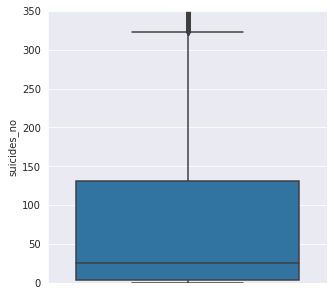

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='suicides_no', data=df)
plt.ylim(0, 350)

(0.0, 4000000.0)

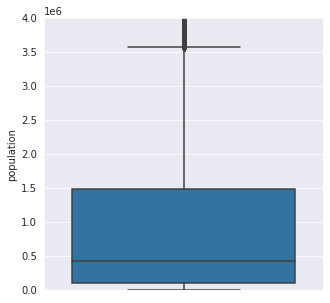

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='population', data=df )
plt.ylim(0, 4000000)


(0.0, 50.0)

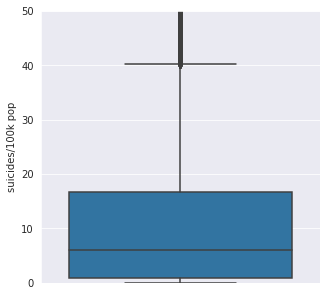

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='suicides/100k pop', data=df)
plt.ylim(0, 50)

(0.0, 800000000000.0)

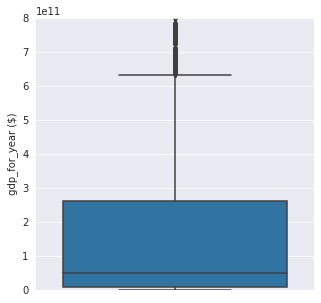

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y=' gdp_for_year ($) ', data=df)
plt.ylim(0, 800000000000)

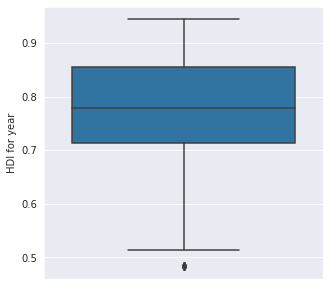

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='HDI for year', data=df)

(0.0, 70000.0)

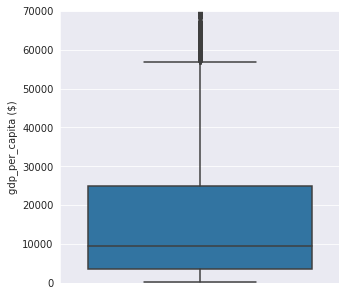

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='gdp_per_capita ($)', data=df)
plt.ylim(0, 70000)

(1, 200)

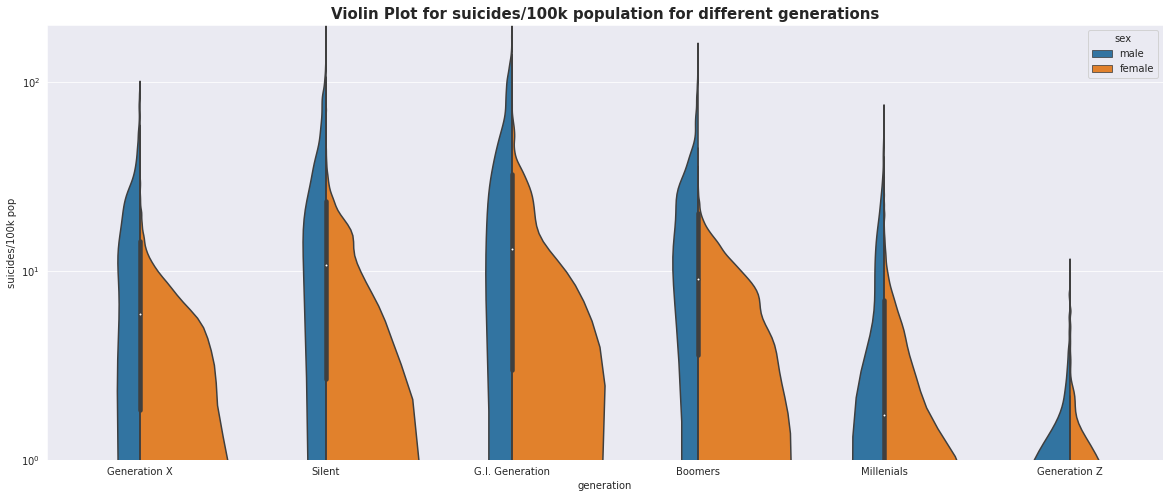

In [ ]:
fig=plt.figure(figsize=(20, 8))
sns.violinplot(x='generation', y='suicides/100k pop',hue='sex', width=1,split=True ,data=df)
plt.title('Violin Plot for suicides/100k population for different generations', fontsize=15, weight='bold')
plt.yscale('log')
plt.ylim(1, 200)

Extra: The above violin plot with log scale of suicide numbers shows the distribution of population as per number of suicides. The wider part of the lower side of each violin plot for each generation shows that most entries have 0 suicides per 100k pop. Also, the shape of the plot describes the distribution of the suicides per 100 k population. Orange hue represents female, showing that suicides amongst females are less than in males, as the violin plots are broader at the base for females.

(iii) Plotting histograms with too few, too many and right number of bins for each continuous variable

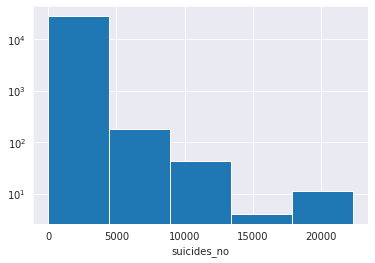

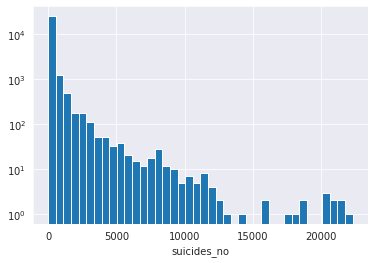

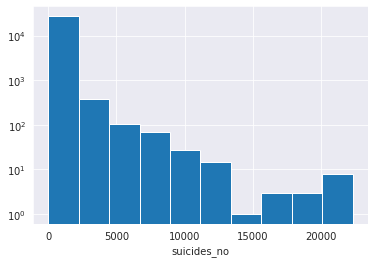

In [ ]:
plt.figure()
plt.hist(df['suicides_no'].dropna(),bins=5, log=True)#drop not a number nan values
plt.xlabel('suicides_no')
plt.show()
plt.hist(df['suicides_no'].dropna(), bins=40, log=True)
plt.xlabel('suicides_no')
plt.show()
plt.hist(df['suicides_no'].dropna(), bins=10, log=True)
plt.xlabel('suicides_no')
plt.show()


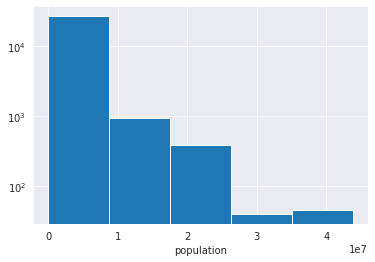

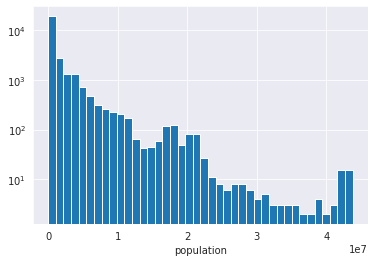

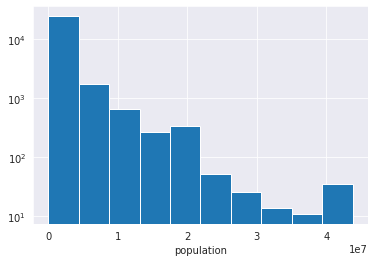

In [ ]:
plt.figure()
plt.hist(df['population'].dropna(), bins=5, log=True)
plt.xlabel('population')
plt.show()
plt.hist(df['population'].dropna(), bins=40, log=True)
plt.xlabel('population')
plt.show()
plt.hist(df['population'].dropna(), bins=10, log=True)
plt.xlabel('population')
plt.show()

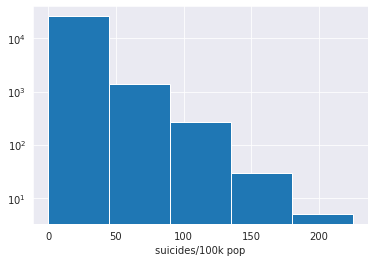

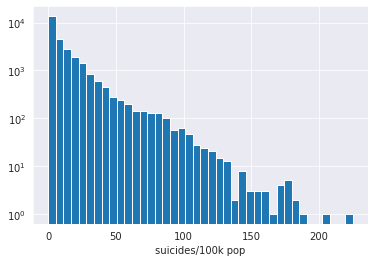

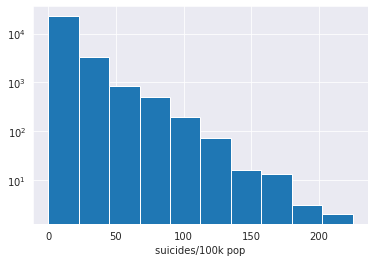

In [ ]:
plt.figure()
plt.hist(df['suicides/100k pop'].dropna(), bins=5, log=True)
plt.xlabel('suicides/100k pop')
plt.show()
plt.hist(df['suicides/100k pop'].dropna(), bins=40, log=True)
plt.xlabel('suicides/100k pop')
plt.show()
plt.hist(df['suicides/100k pop'].dropna(), bins=10, log=True)
plt.xlabel('suicides/100k pop')
plt.show()

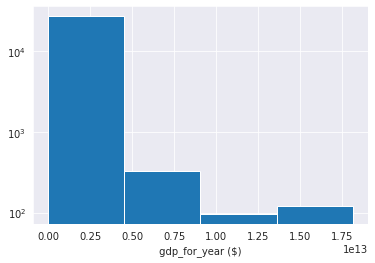

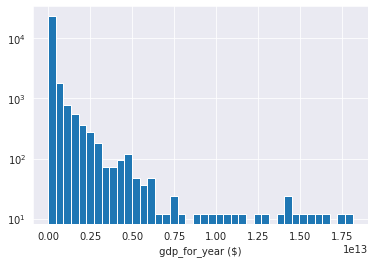

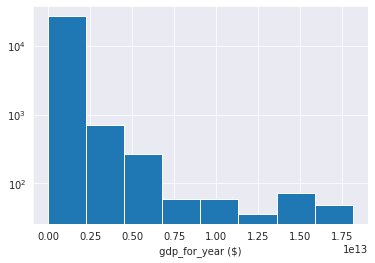

In [ ]:
plt.figure()
plt.hist(df[' gdp_for_year ($) '].dropna(), bins=4, log=True)
plt.xlabel(' gdp_for_year ($) ')
plt.show()
plt.hist(df[' gdp_for_year ($) '].dropna(), bins=40, log=True)
plt.xlabel(' gdp_for_year ($) ')
plt.show()
plt.hist(df[' gdp_for_year ($) '].dropna(), bins=8, log=True)
plt.xlabel(' gdp_for_year ($) ')
plt.show()

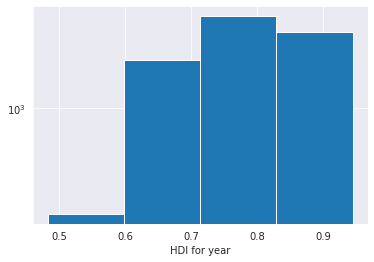

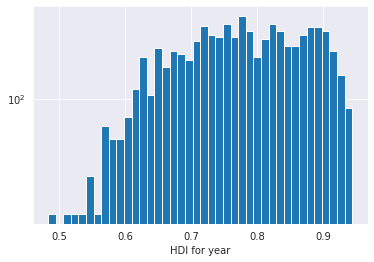

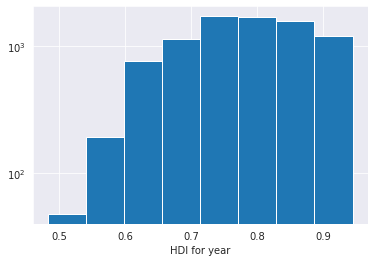

In [ ]:
plt.figure()
plt.hist(df['HDI for year'].dropna(), bins=4, log=True)
plt.xlabel('HDI for year')
plt.show()
plt.hist(df['HDI for year'].dropna(), bins=40, log=True)
plt.xlabel('HDI for year')
plt.show()
plt.hist(df['HDI for year'].dropna(), bins=8, log=True)
plt.xlabel('HDI for year')
plt.show()

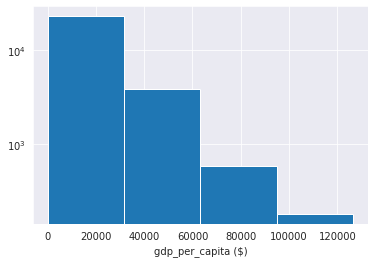

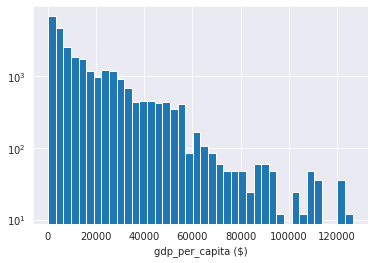

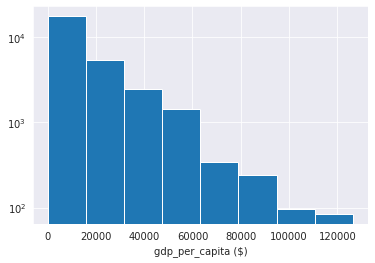

In [ ]:
plt.figure()
plt.hist(df['gdp_per_capita ($)'].dropna(), bins=4, log=True)
plt.xlabel('gdp_per_capita ($)')
plt.show()
plt.hist(df['gdp_per_capita ($)'].dropna(), bins=40, log=True)
plt.xlabel('gdp_per_capita ($)')
plt.show()
plt.hist(df['gdp_per_capita ($)'].dropna(), bins=8, log=True)
plt.xlabel('gdp_per_capita ($)')
plt.show()

(iv)Plotting qqplot for checking normalcy in the distribution

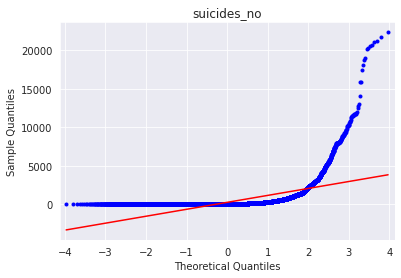

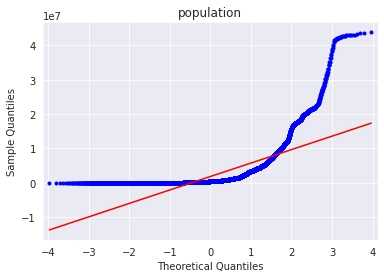

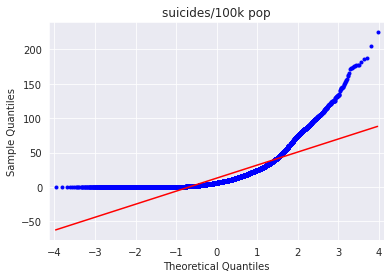

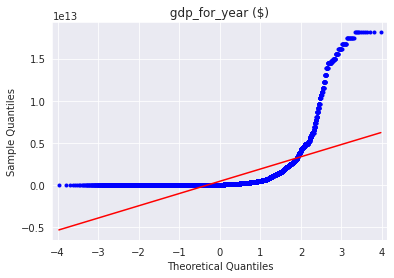

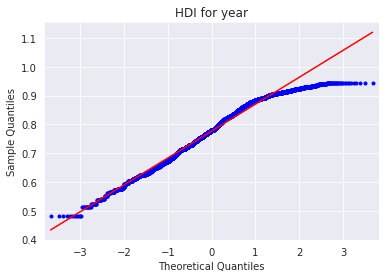

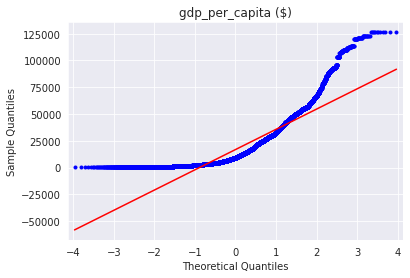

In [ ]:
for i in continuousvariables:
  figs=sm.qqplot(df[i].dropna(), line='s', marker='.')
  plt.title(i)
  plt.show()
#plotting qq plots, line='s' shows a line which is fitted to the data's std dev and mean

(a) Suicides_no is skewed highly to the right,, with thin tails and is hence deviates greatly from normal distribution.<br>
(b)Suicides/100k pop also deviates greatly from the normal, and is skewed right. <br>
(c)gdp for year is also skewed to the right, deviating from normalcy.<br>
(d)HDI for year is Thin Tailed distribution, meaning that most of the entries are concentrated towards the mean, and less away from the mean.<br>
(e)gdp per capita is skewed right, with thin tails.

Ans1. (c) (v)Determining whether the variables vary log normally

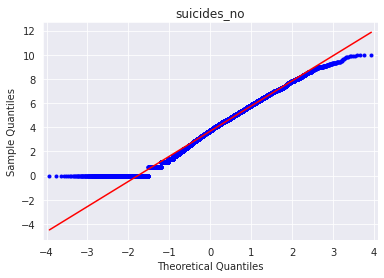

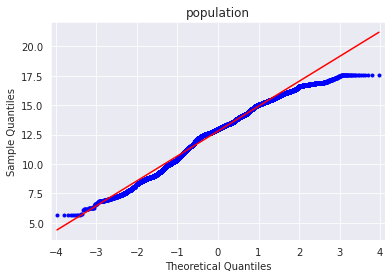

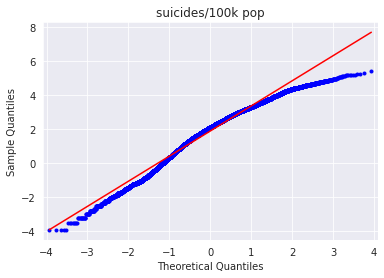

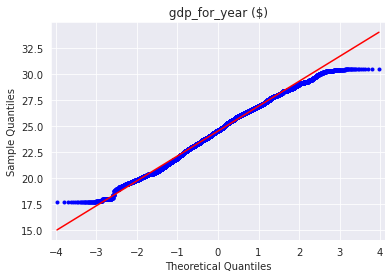

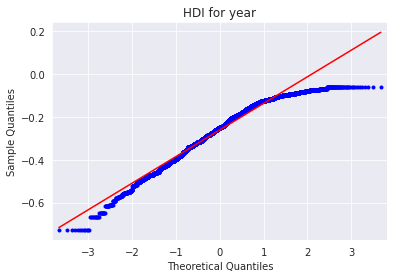

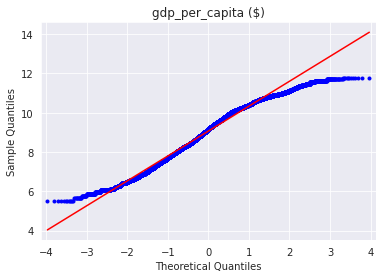

In [ ]:
for i in continuousvariables:
  a=df[i]
  a=[x for x in a if  not np.isnan(x) and x>0 ]
  a=np.log(a)    # taking log of all values for plot lognormal qq plot
  fig=sm.qqplot(np.array(a), line='s', marker='.', )
  plt.title(i)
  plt.show()


From the above log qq plots, we find that none of the continuous variables vary log normally. But, the variable closest to varying log normally is population.

##(d) Pairwise Interaction

(i) Plotting box and whiskers plots for continuous variables, side by side for each value of discrete varibles.

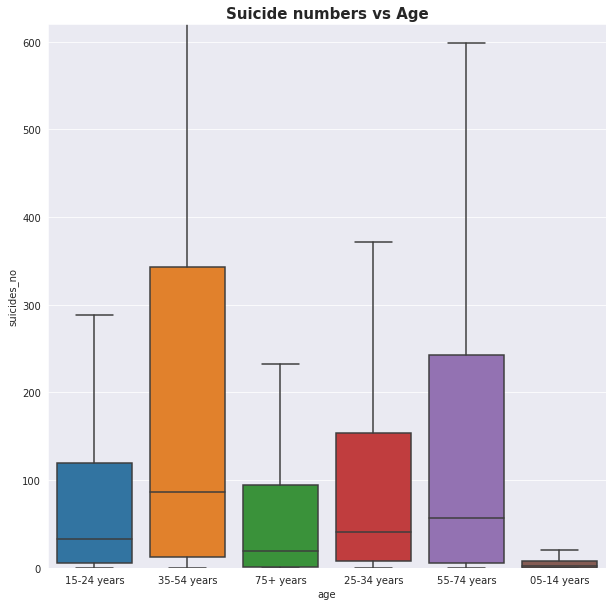

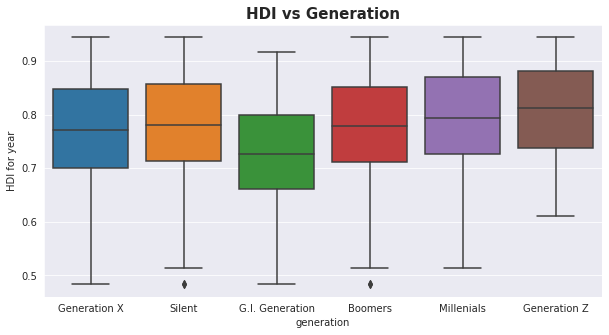

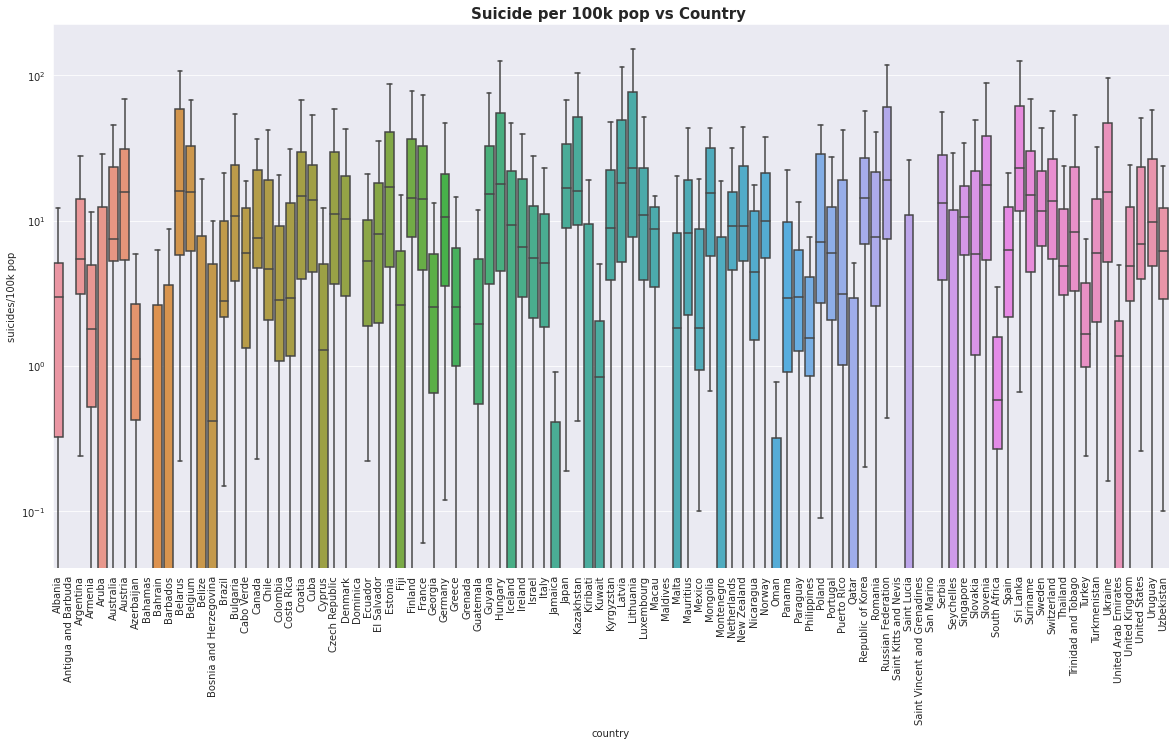

In [ ]:
fig=plt.figure(figsize=(10, 10))
plot=sns.boxplot(x='age', y='suicides_no', data=df, showfliers=False)
plt.ylim(0, 620)
plt.title('Suicide numbers vs Age', fontsize=15, weight='bold')
#showfliers shows outlying data
plt.show()
fig=plt.figure(figsize=(10, 5))
plot=sns.boxplot(x='generation', y='HDI for year', data=df)
plt.title('HDI vs Generation', fontsize=15, weight='bold')
plt.show()
fig=plt.figure(figsize=(20, 10))
plot=sns.boxplot(x='country', y='suicides/100k pop', showfliers=False,data=df)
plt.title('Suicide per 100k pop vs Country ', fontsize=15, weight='bold')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()
#3 boxplots plotted for different variables

(ii) Plotting heatmap of correlation between all continuous variables.

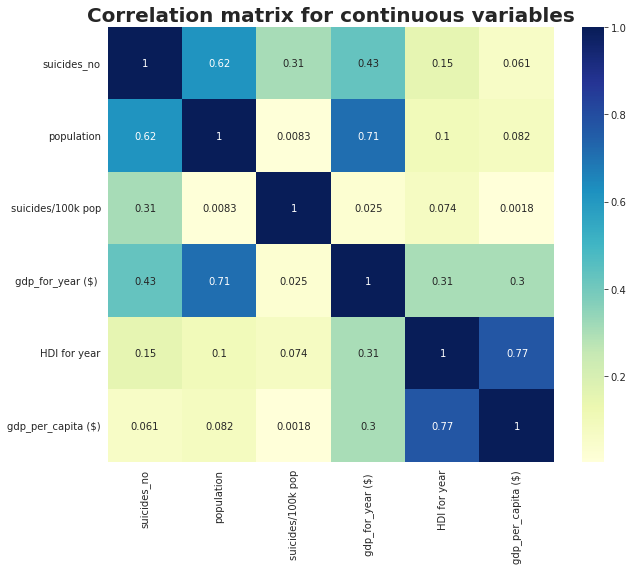

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df[continuousvariables].corr(), cmap='YlGnBu',annot=True)
plt.title('Correlation matrix for continuous variables', weight='bold', fontsize=20)
plt.show()

We observe that there is a correlation between gdp per capita and HDI, which is quite obvious from the fact that higher gdp per capita means better resource availability and more consumer affordability, implying more HDI. <br>The correlation between gdp for year and population is also obvious, as more population implies more gross product of the country.<br> Also, a country is more likely to have ore suicides if its population is large, as depicted above. 

#ANS 1(d)(iii) 
Perform an EDA on a dataset of your choice and share your insights. 

In [ ]:
dfb=pd.read_csv('covid_data.csv')
dfb.head()
#dataset chosen in covid dataset for deaths per state and other parameters


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7600,13,7458,129,0.17,98.13,1.70
1,Andhra Pradesh,2039529,14388,2011063,14078,0.71,98.60,0.69
2,Arunachal Pradesh,54126,410,53444,272,0.76,98.74,0.50
3,Assam,598423,4984,587632,5807,0.83,98.20,0.97
4,Bihar,725901,69,716173,9659,0.01,98.66,1.33


In [ ]:
print(f"number of records : {dfb.shape[0]}") 
#number of records

print(f"number of variables:{dfb.shape[1]}")
#number of variables

number of records : 36
number of variables:8


In [ ]:
dfb.dtypes
#data type of each column

State/UTs               object
Total Cases              int64
Active                   int64
Discharged               int64
Deaths                   int64
Active Ratio (%)       float64
Discharge Ratio (%)    float64
Death Ratio (%)        float64
dtype: object

In [ ]:
for col in dfb:
  print(f"{dfb[col].name} has {dfb[col].isnull().sum()} missing entries")
#loop for printing number of missing variable values

State/UTs has 0 missing entries
Total Cases has 0 missing entries
Active has 0 missing entries
Discharged has 0 missing entries
Deaths has 0 missing entries
Active Ratio (%) has 0 missing entries
Discharge Ratio (%) has 0 missing entries
Death Ratio (%) has 0 missing entries


No missing entries, so all columns and records are complete.

In [ ]:
for cols in dfb:
  print(f"Number of unique values in column(/variable) {dfb[cols].name} are - {len(dfb[cols].unique())}")
#printing number of unique values in each column

Number of unique values in column(/variable) State/UTs are - 36
Number of unique values in column(/variable) Total Cases are - 36
Number of unique values in column(/variable) Active are - 36
Number of unique values in column(/variable) Discharged are - 36
Number of unique values in column(/variable) Deaths are - 35
Number of unique values in column(/variable) Active Ratio (%) are - 28
Number of unique values in column(/variable) Discharge Ratio (%) are - 32
Number of unique values in column(/variable) Death Ratio (%) are - 31


In [ ]:
discretevariablesb=['State/UTs']
continuousvariablesb=['Total Cases', 'Active', 'Discharged', 'Deaths', 'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)']
#declaring continuous and discrete variables list

In [ ]:
for col in continuousvariablesb:
  print(f"For variable {dfb[col].name} :")
  print(f"mean is: {dfb[col].mean()}")
  print(f"variance is: {dfb[col].var()}")
  print(f"skew is: {dfb[col].skew()}")
  print(f"min is: {dfb[col].min()}   and maximum is:{dfb[col].max()}")
  print(f"median is: {dfb[col].quantile(q=.5)}")
  print(f"the 25th percentile is: {dfb[col].quantile(q=.25)}")
  print(f"the 75th percentile is: {dfb[col].quantile(q=.75)}")
  print(f"Inter Quartile Range is:{dfb[col].quantile(q=.75) - dfb[col].quantile(q=.25)}")
  print('\n')
#printing statistical data

For variable Total Cases :
mean is: 930681.5
variance is: 1894415023024.7144
skew is: 2.632392367272584
min is: 7600   and maximum is:6524498
median is: 473274.0
the 25th percentile is: 81011.75
the 75th percentile is: 1009009.0
Inter Quartile Range is:927997.25


For variable Active :
mean is: 8599.305555555555
variance is: 815681354.1611112
skew is: 5.264928599970321
min is: 0   and maximum is:167578
median is: 438.5
the 25th percentile is: 136.75
the 75th percentile is: 4956.25
Inter Quartile Range is:4819.5


For variable Discharged :
mean is: 909710.3888888889
variance is: 1785906690604.8157
skew is: 2.6075757294135817
min is: 7458   and maximum is:6340723
median is: 463727.0
the 25th percentile is: 73807.5
the 75th percentile is: 995342.0
Inter Quartile Range is:921534.5


For variable Deaths :
mean is: 12371.805555555555
variance is: 565717881.1896825
skew is: 4.5357764000966885
min is: 4   and maximum is:138546
median is: 5470.0
the 25th percentile is: 815.75
the 75th percentil

### Ploting bar and whiskers plot for each of the continuous variables. 

(0.0, 2200000.0)

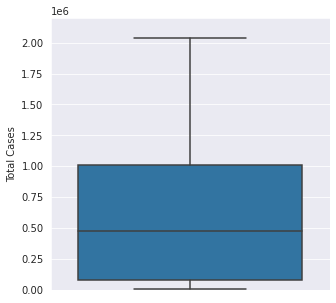

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='Total Cases', data=dfb, showfliers=True)
plt.ylim(0, 2200000)

(0.0, 20000.0)

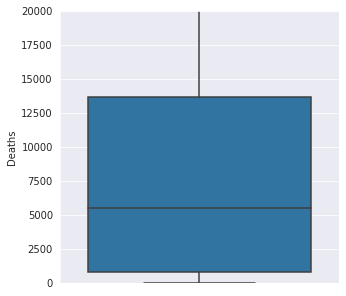

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='Deaths', data=dfb)
plt.ylim(0, 20000)

(0.0, 3000000.0)

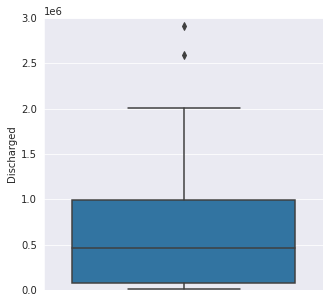

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='Discharged', data=dfb)
plt.ylim(0, 3000000)

(0.0, 2.0)

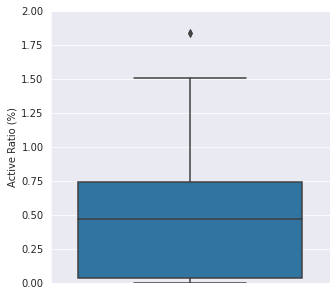

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='Active Ratio (%)', data=dfb)
plt.ylim(0, 2)

(0.0, 2.0)

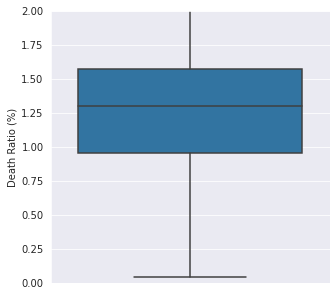

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='Death Ratio (%)', data=dfb)
plt.ylim(0, 2)

(95.0, 100.0)

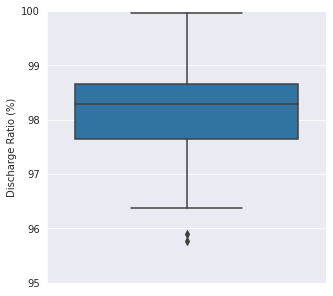

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.boxplot(y='Discharge Ratio (%)', data=dfb)
plt.ylim(95, 100)

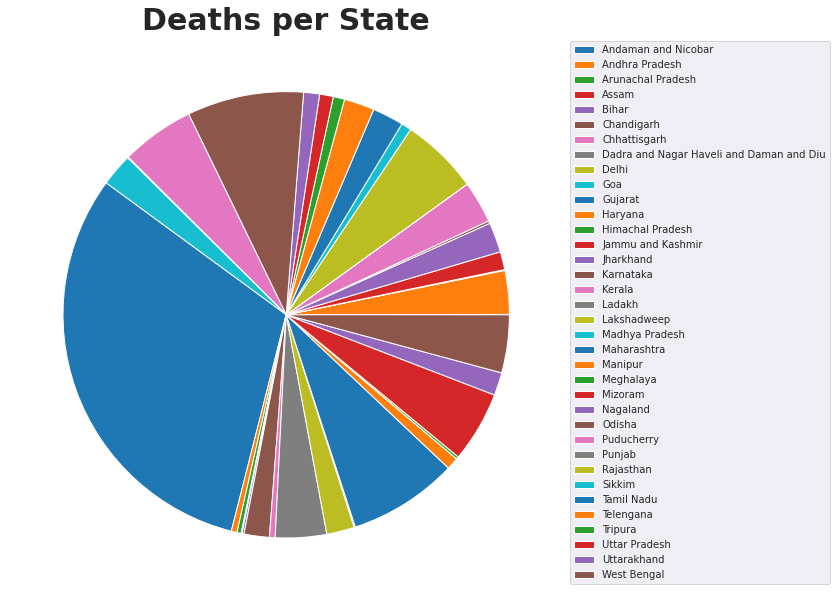

In [ ]:
fig=plt.figure(figsize=(10, 20))
plt.pie(dfb['Deaths'])
plt.legend(labels=dfb['State/UTs'], 
           bbox_to_anchor=(1,1))
plt.title('Deaths per State', fontsize=30, weight='bold')
plt.show()
#plotting pie chart for displaying relative number of deaths

From the above pie chart, we see that the greater percentage of deaths have occured in the states of Maharashtra, Gujarat and Karnataka.

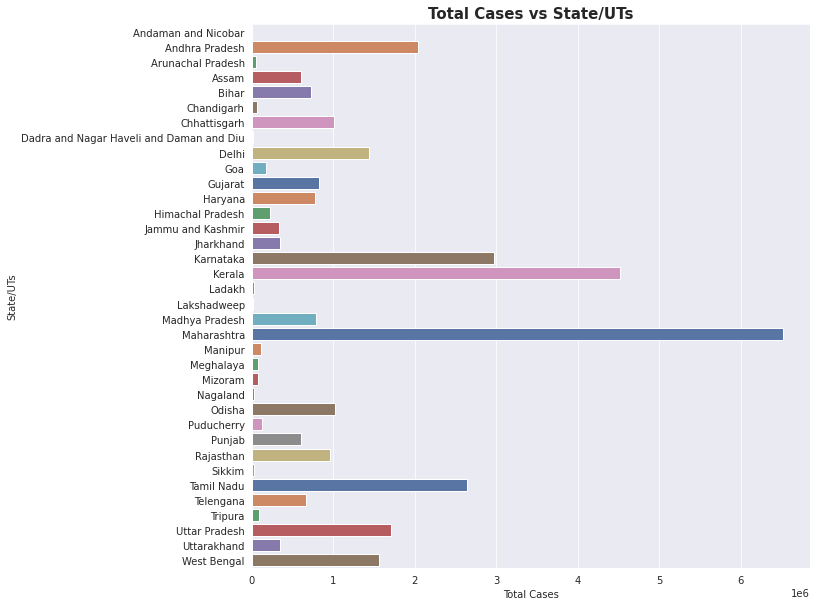

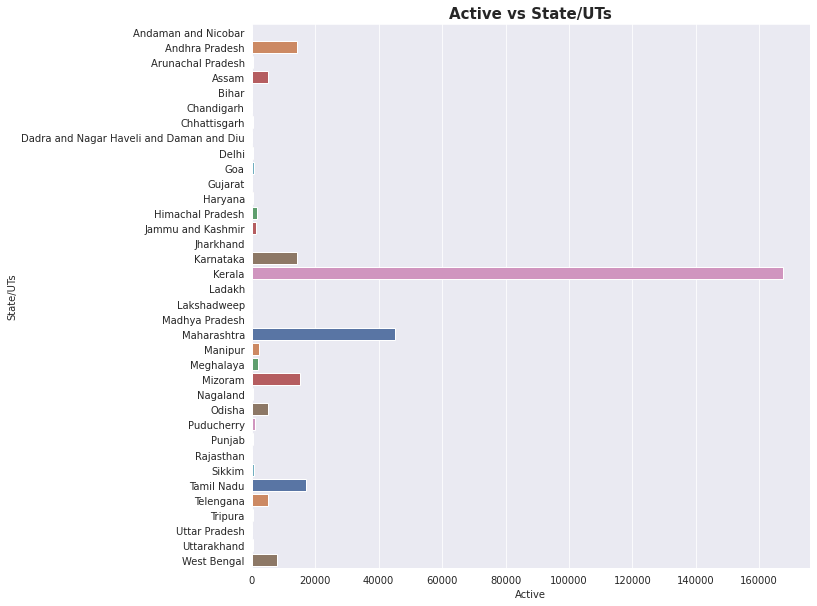

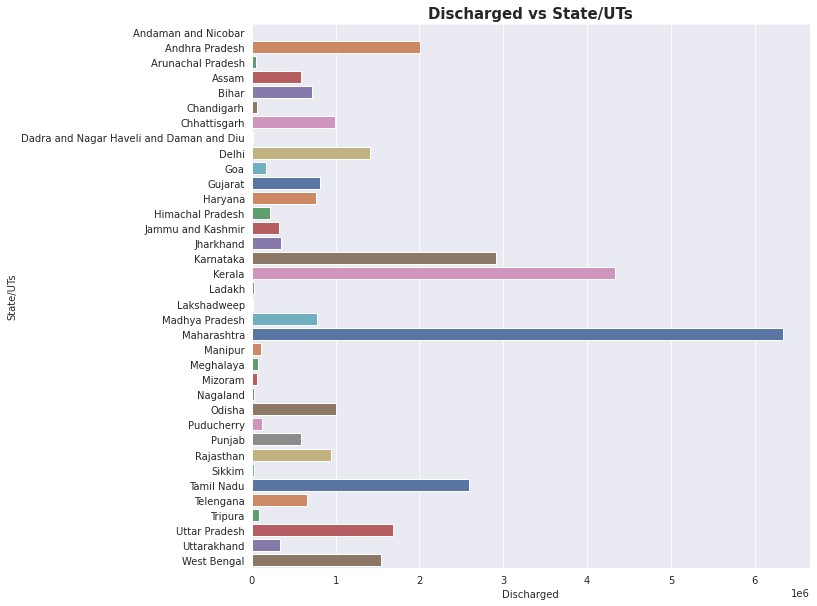

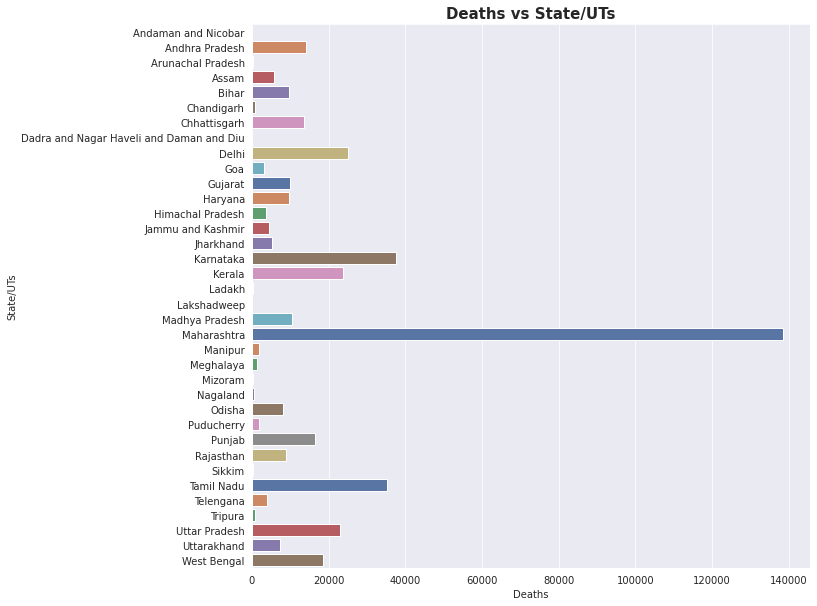

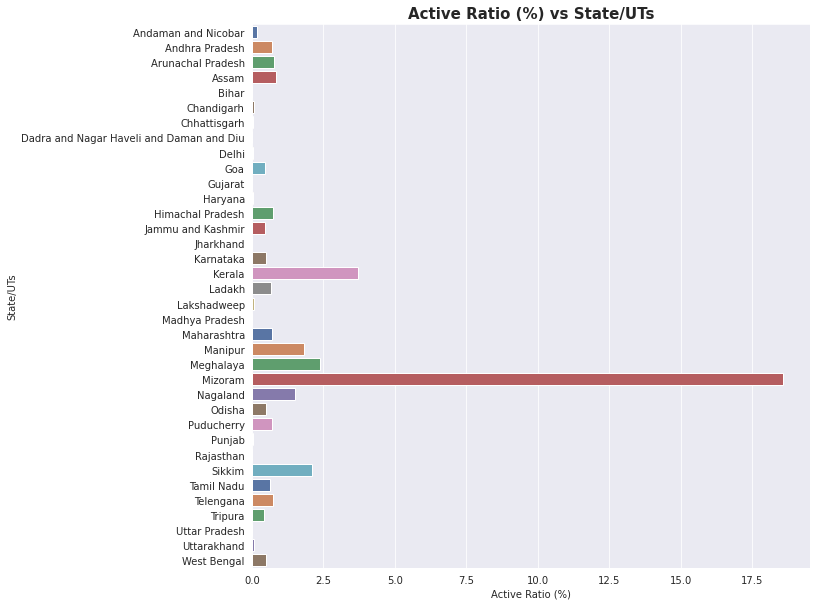

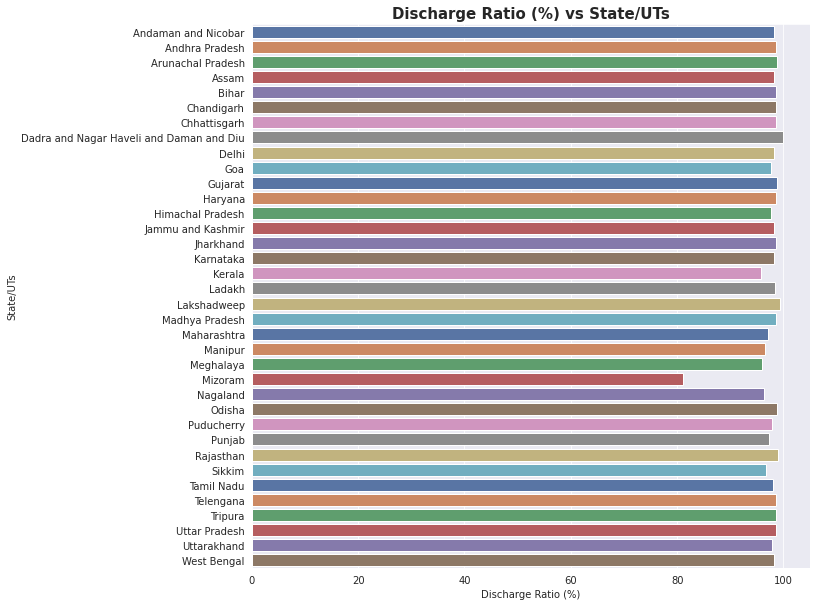

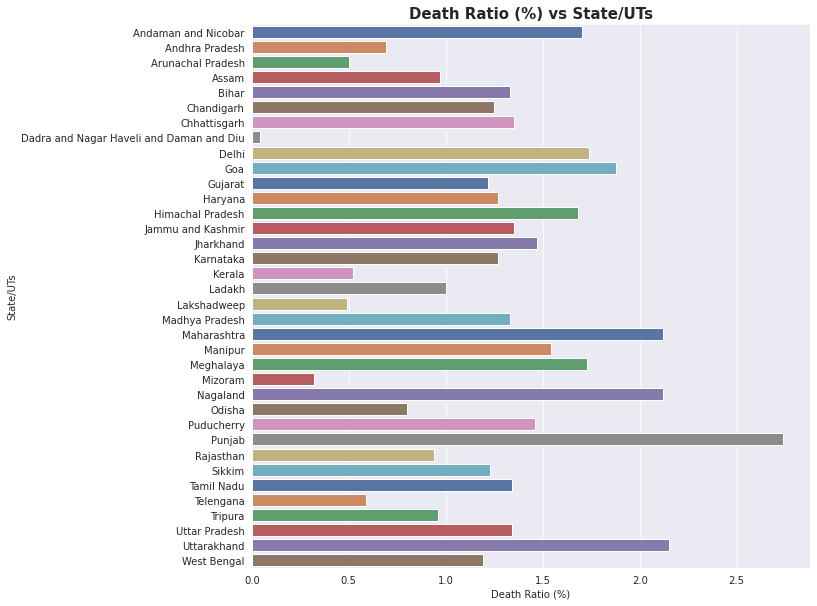

In [ ]:
for i in continuousvariablesb:
  fig=plt.figure(figsize=(10, 10))
  sns.barplot(x=dfb[i], y='State/UTs', palette='deep', data=dfb)
  plt.title(f'{i} vs State/UTs', fontsize=15, weight='bold')

#categorical plot barplot implemented

Total Cases - Similar observation as depicted by bar graph<br>
Active Cases, Deaths, Discharged also follow the same observation as above, that populous states have suffered higher damage than lower populous states, in terms of absolute numbers.<br>
Active Ratio(%) -  It is highest for Mizoram, as it had been isolated from the first wave due to its landlocked geography and less accessibility, but has bore the brunt in the current wave. <br>
Discharge Ratio(%) - It is almost same for all the states, because it is influenced by death ratio only, which forms a small percentage of all patients.<br>
Death Ratio(%) - The death ratio is highest in Punjab, Nagaland, Maharashtra and Uttarakhand. 

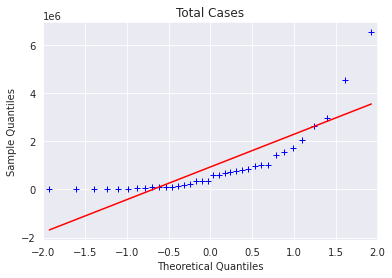

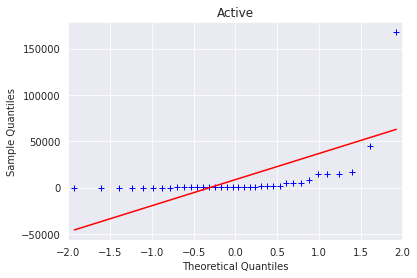

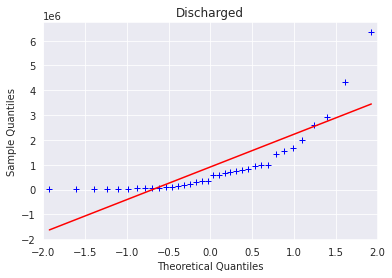

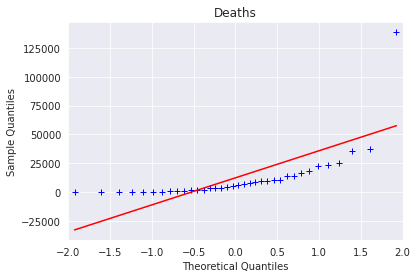

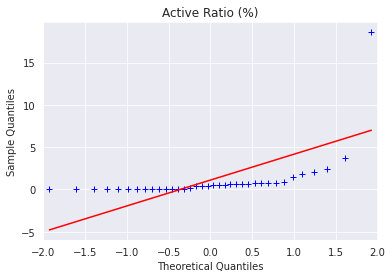

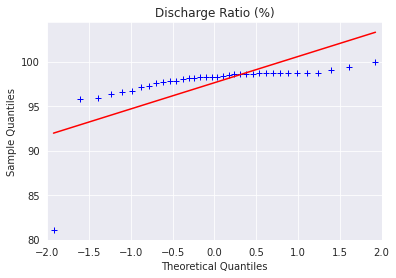

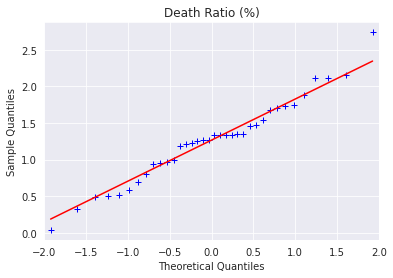

In [ ]:
for i in continuousvariablesb:
  figs=sm.qqplot(dfb[i].dropna(), line='s', marker='+')
  plt.title(i)
  plt.show()
#plotting qq plot

From the above qqplots, we conclude that the variables are highly skewed, and making any assumptions from a small dataset of 36 records would be futile. 

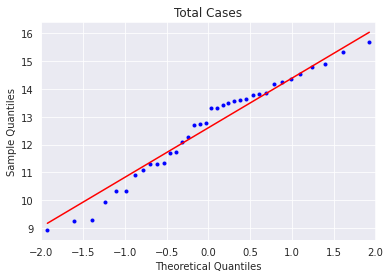

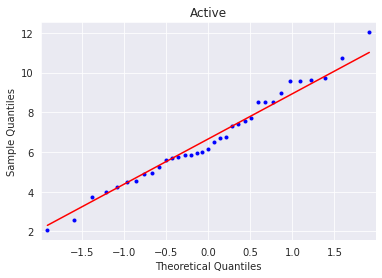

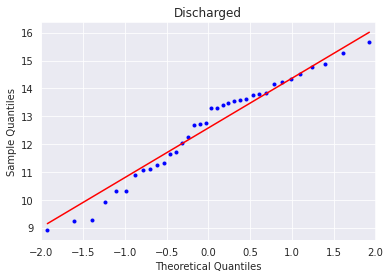

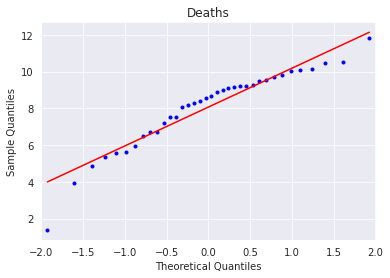

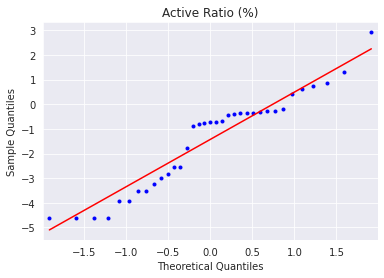

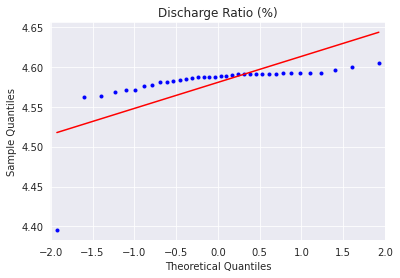

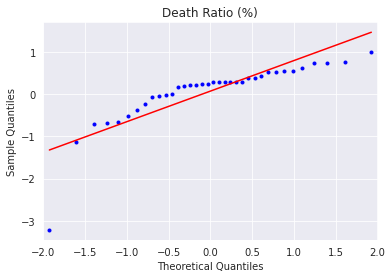

In [ ]:
for i in continuousvariablesb:
  a=dfb[i]
  a=[x for x in a if  not np.isnan(x) and x>0 ]
  a=np.log(a)
  fig=sm.qqplot(np.array(a), line='s', marker='.', )
  plt.title(i)
  plt.show()
#plotting log normal qq plots

Similarly, the none of the continuous variables are log normal.

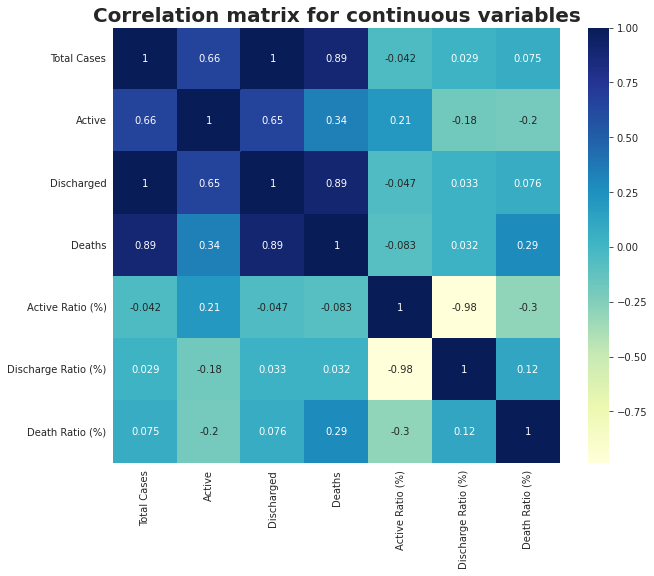

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(dfb[continuousvariablesb].corr(), cmap='YlGnBu',annot=True)
plt.title('Correlation matrix for continuous variables', weight='bold', fontsize=20)
plt.show()

The above heatmap shows the correlation between various continuous variables. Higher correlation between the deaths, total cases and discharged shows that all these variables are highly correlated, pointing to the obvious fact that they are dependent on population of the state. 

#ANSWER 2

(a) Picking top six countries by yearly averaged suicides, and displaying suicides per year separately.

In [ ]:
df2=df.groupby(['country', 'year']).sum()

In [ ]:
df3=df2.groupby('country').mean()

In [ ]:
list_countries6=df3.nlargest(6, 'suicides_no').index.tolist()
list_countries6
#list of 6 countries with most suicides

['Russian Federation',
 'United States',
 'Japan',
 'Ukraine',
 'Germany',
 'France']

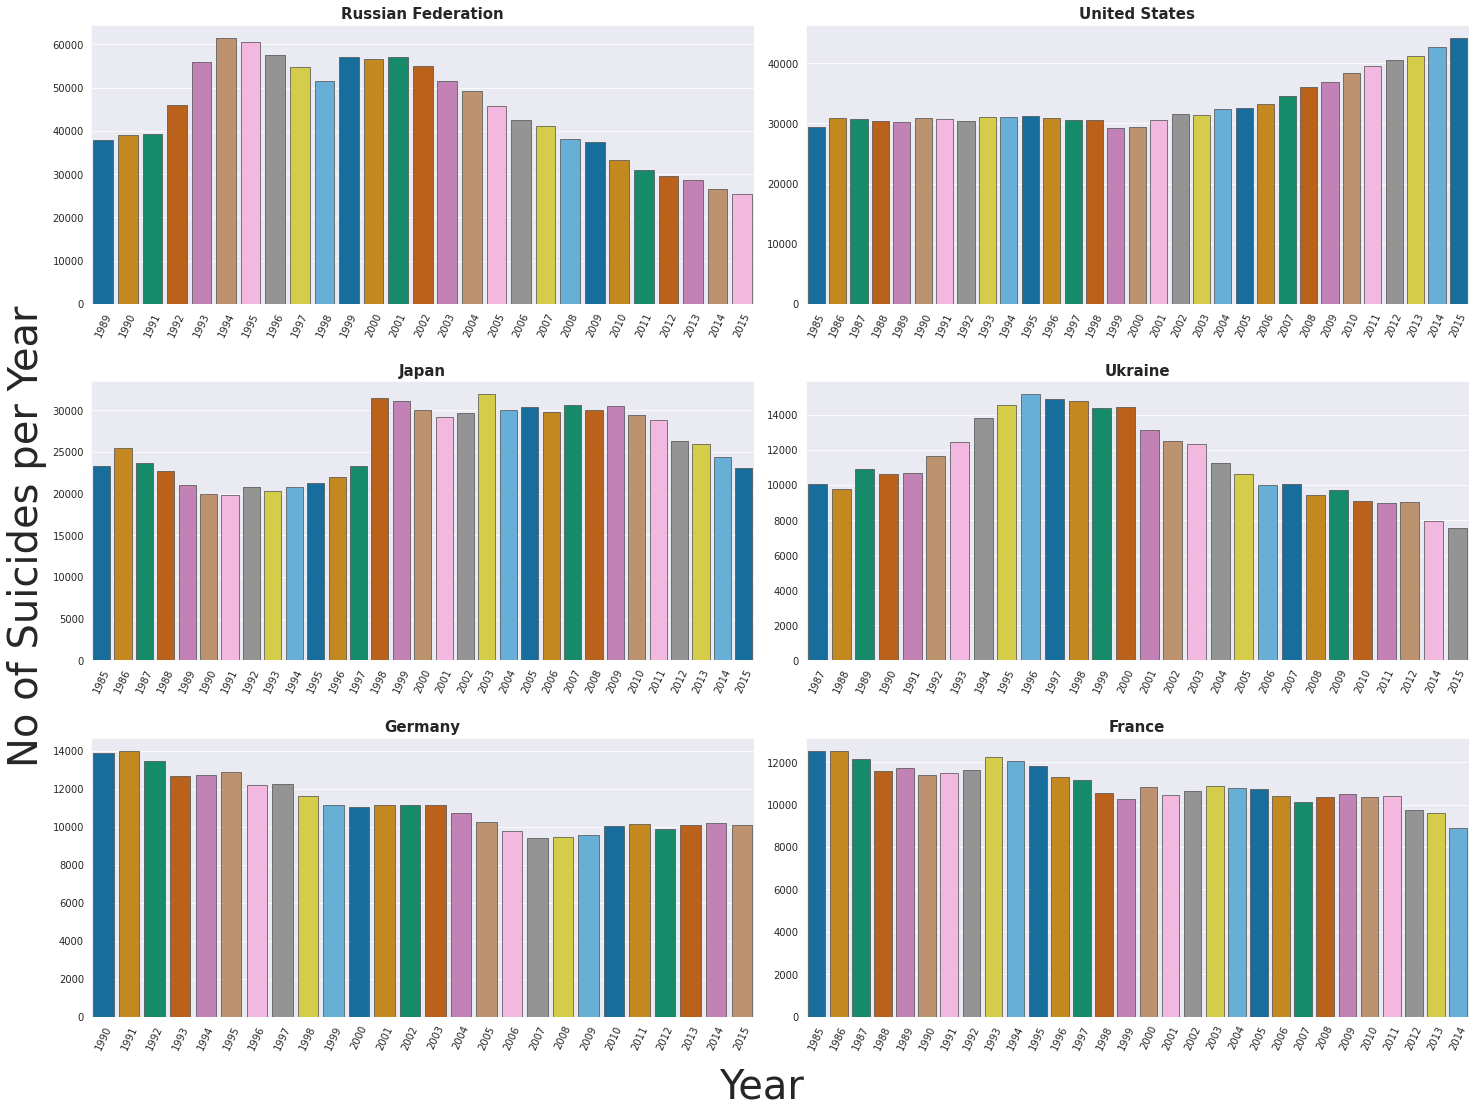

In [ ]:
fig=plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

for l in range(6):
  fig.add_subplot(3, 2, l+1)
  sns.set_style('darkgrid')   #setting backdrop 
  plt.xticks(rotation=65)
  df3=df2.xs(list_countries6[l], level='country')['suicides_no']  #accessing the dataset with given constraints and copying it 
  
  figplot=sns.barplot(y= df3.values, x=df3.index, palette='colorblind', linewidth=.7, edgecolor='0.3')
  plt.title(list_countries6[l], fontsize=15, weight='bold')
  
  figplot.set_xlabel(' ')
fig.text(0.5,-0.01, "Year", ha="center", va="center",fontsize=40)
fig.text(-0.01,0.5, "No of Suicides per Year",rotation=90, ha="center", va="center",fontsize=40) # setting text to be displayed for the entire figure
plt.tight_layout()
plt.show()

#plotting the graphs for the six countries

(b) Comparing the distribution of suicides amongst various age groups amongst the above six countries.

In [ ]:
df4=df.groupby(['country', 'age']).sum()

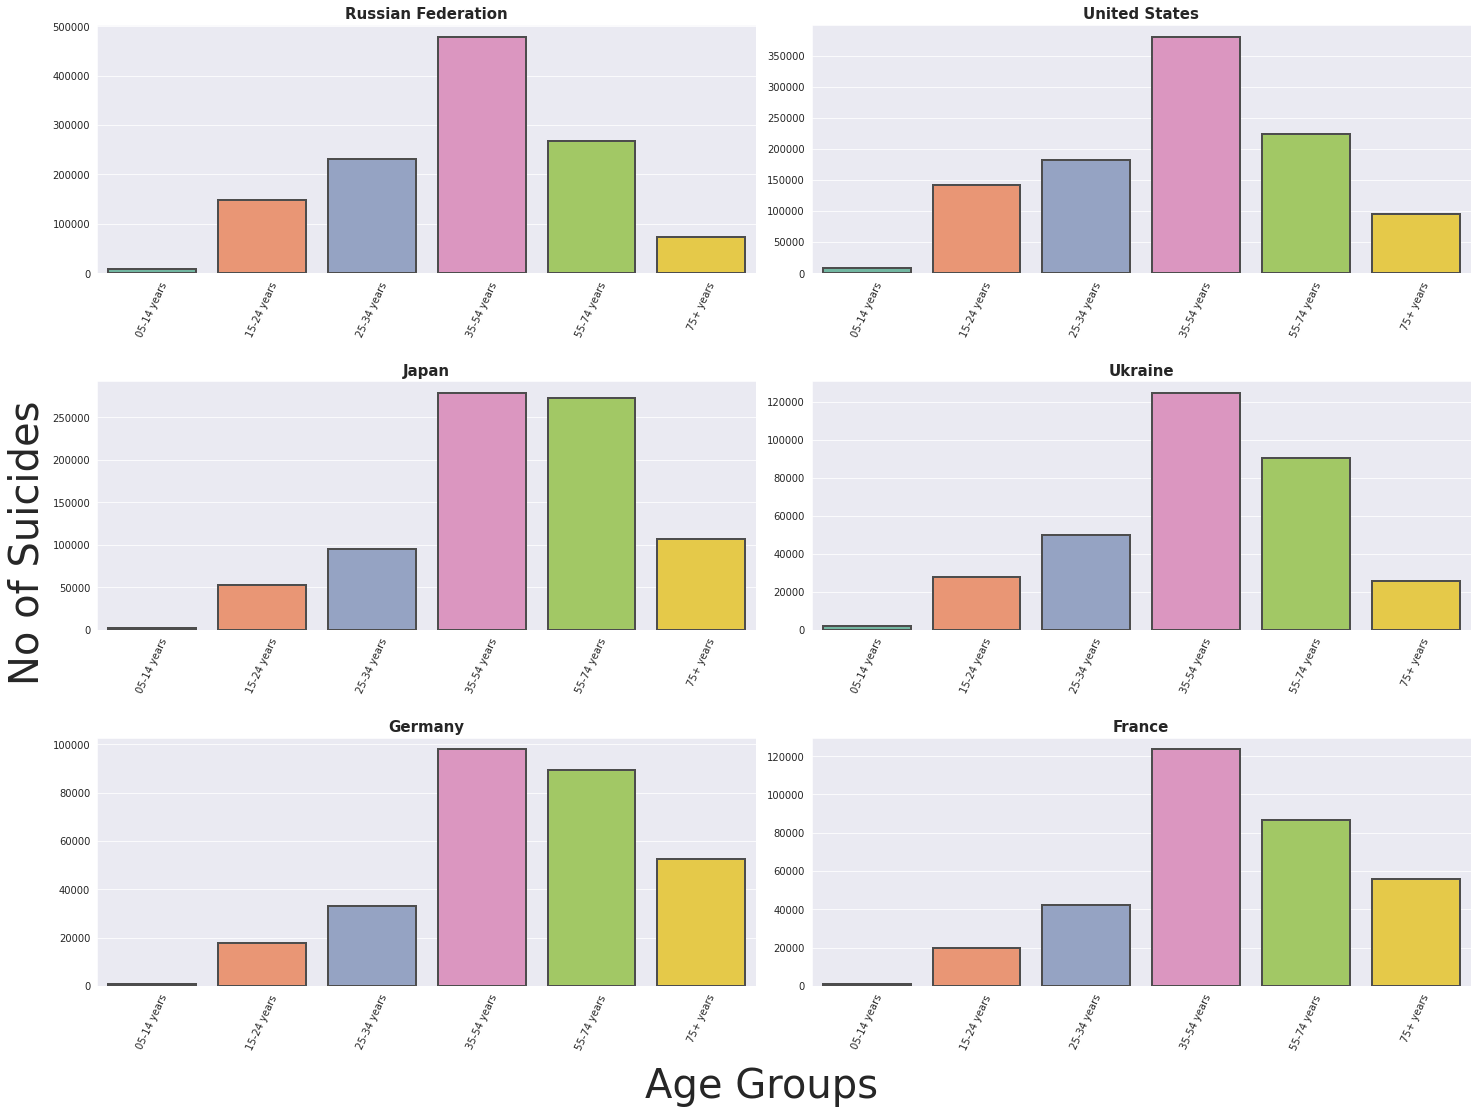

In [ ]:
fig=plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)


for l in range(6):
  fig.add_subplot(3, 2, l+1)
  sns.set_style('darkgrid')
  plt.xticks(rotation=65)
  df5=df4.xs(list_countries6[l], level='country')['suicides_no']   #accessing the dataset with given constraints and copying it 
  
  figplot=sns.barplot(y= df5.values, x=df5.index, palette='Set2', linewidth=2, edgecolor='0.3') #plotting barplot in seaborn
  plt.title(list_countries6[l], fontsize=15, weight='bold') #plotting bar graph
  
  figplot.set_xlabel(' ')  #blank x label 
fig.text(0.5,-0.01, "Age Groups", ha="center", va="center",fontsize=40)
fig.text(-0.01,0.5, "No of Suicides ",rotation=90, ha="center", va="center",fontsize=40) # setting text to be displayed for the entire figure
plt.tight_layout()
plt.show()



From the above graphs, we see a constant trend of numbers along different age groups in different countries. This is representative of the fact that social factors cut across boundaries, and country affects the distribution of suicides in various age groups of the society to only a small extent. Although, a striking difference observed in the distribution for japan is that, the 55-74 yrs age group has significantly higher suicide numbers, owing to the high life expectancy of the people of Japan.

(c) Showing the consistency amongst number of suicides between men and women


In [ ]:
df6=df[df['sex']=='male']
df7=df6.groupby(['year']).mean()

In [ ]:
df8=df[df['sex']=='female']
df9=df8.groupby(['year']).mean()

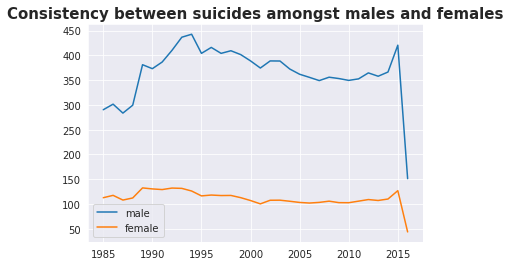

In [ ]:
plt.plot(df7.index, df7['suicides_no'], label='male')
plt.plot(df9.index, df9['suicides_no'], label='female')
plt.title('Consistency between suicides amongst males and females', fontsize=15, weight='bold')
plt.legend()
plt.show()
#plotting line chart

The number of suicides in men is consistently higher than those in women as depicted by the above line graphs.

(d) Using an appropriate graph to show the worst year for each generation in the USA.

In [ ]:
generationlist=df['generation'].unique().tolist()
generationlist
#creating a list of all generations 

['Generation X',
 'Silent',
 'G.I. Generation',
 'Boomers',
 'Millenials',
 'Generation Z']

In [ ]:
df10=df[df['country']=='United States']
df10.head()
#creating a dataframe for US only

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,0.841,4.346734e+12,19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,0.841,4.346734e+12,19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,0.841,4.346734e+12,19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,0.841,4.346734e+12,19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,0.841,4.346734e+12,19693,Generation X


In [ ]:
df11=df10.groupby(['generation', 'year']).sum()

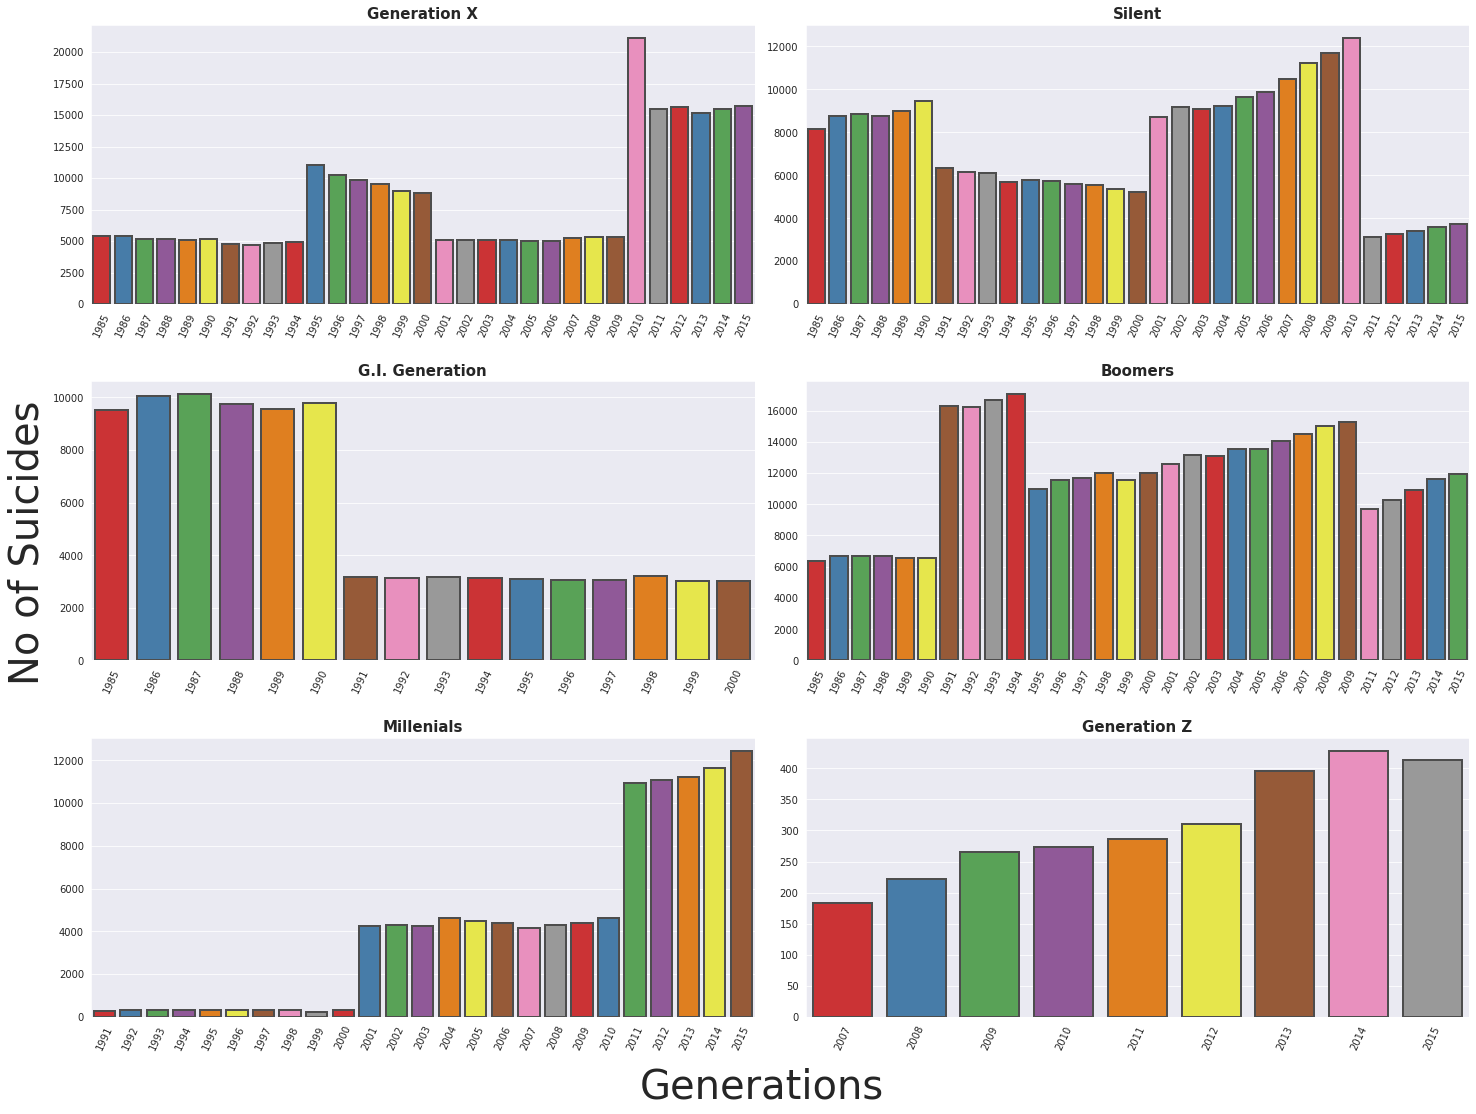

In [ ]:
fig=plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)


for l in range(6):
  fig.add_subplot(3, 2, l+1)
  sns.set_style('darkgrid')
  plt.xticks(rotation=65)
  df12=df11.xs(generationlist[l], level='generation')['suicides_no']    #accessing the dataset with given constraints and copying it 
  #plotting subplots in a single figure
  figplot=sns.barplot(y= df12.values, x=df12.index, palette='Set1', linewidth=2, edgecolor='0.3')
  plt.title(generationlist[l], fontsize=15, weight='bold')
  
  figplot.set_xlabel(' ')

fig.text(0.5,-0.01, "Generations", ha="center", va="center",fontsize=40)
fig.text(-0.01,0.5, "No of Suicides ",rotation=90, ha="center", va="center",fontsize=40)
#fig.text used since plt.x/ylabels gives only particular subplot representation
plt.tight_layout()
plt.show()

The graphs show the worst year for each generation in the USA. The worst years for each generation are-<br>
(a)Gen X - 2010<br>
(b)Silent gen - 2010<br>
(c)G.I. gen - 1987<br>
(d)Boomers - 1994<br>
(e)Millenials - 2015<br>
(f)Gen Z - 2014<br>

In [ ]:
countrieslist=['Japan', 'Armenia', 'United Kingdom', 'Israel', 'Austria']

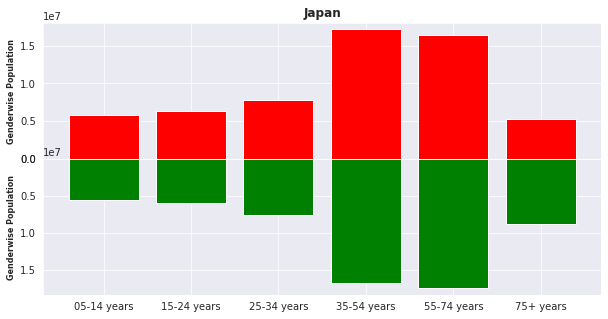

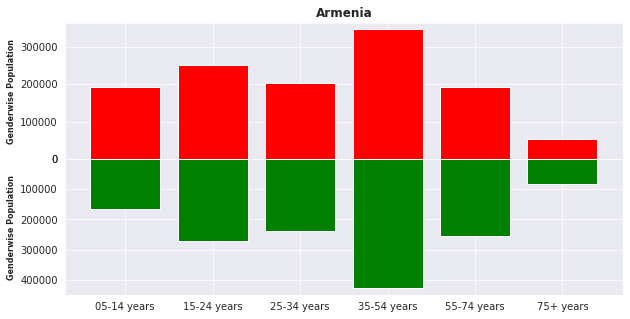

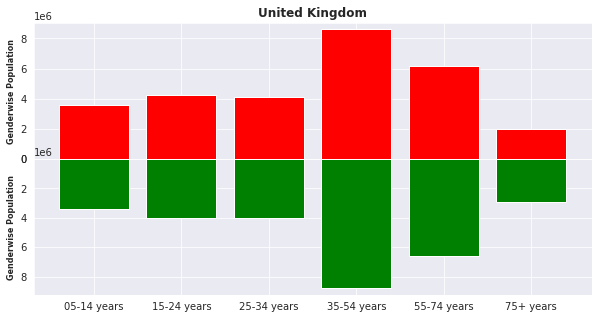

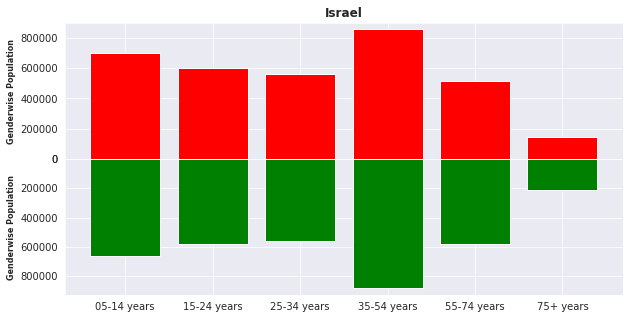

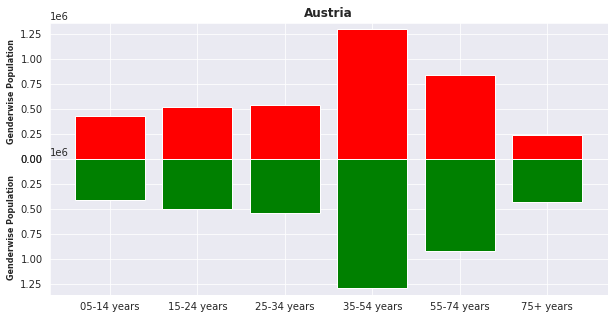

In [ ]:


df20=df.groupby(['year', 'country', 'sex', 'age']).sum()
df21=df20.xs(2010,level='year')    #accessing the dataset with given constraints and copying it 
df21=df21.reset_index()
for i in countrieslist:
  df22=df21.loc[df21['country']==i]  #creates a new database for a single country
  df22female=df22[df22['sex']=='female'][['population', 'age']]  # databases for males and females
  df22male=df22[df22['sex']=='male'][['population', 'age']]

  df22male.reset_index(inplace=True, drop=True)  # changing index, drop = true deletes old index, inplace=true does not create a new object
  df22female.reset_index(inplace=True, drop=True)

 
  df22merged=pd.merge(df22male, df22female,on='age' )   # merging databases with age as common variable 
    
 
  
  df22merged=df22merged[['age', 'population_x', 'population_y']]  #keeping only required variables
  
  
  figs, axis=plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5)) #sharex = true sets the graph subplots to have a common x axis 
 
  for a, b, c, d in zip( axis.ravel(), ['population_x', 'population_y'], ['red', 'green'], [ False,True]): 
    #ravel() makes an array, which can be linearly iterated on
    a.set_ylabel('Genderwise Population', fontsize=8, weight='bold')
    a.bar(df22merged['age'],df22merged[b], color=c)
    
    
    if d:
      a.invert_yaxis()  # inverts the y axis
    else:
      a.set_title(i, weight='bold')

  plt.subplots_adjust(hspace=0) #hspace=0 ensures the two mirror graphs coincide on the x axis




The Red bar graphs show the population of men, and the Green graphs show the population of women. From the graph we can infer that the total population of men in more for ages upto 54 yrs(in most cases), but men's population decreases after 55 yrs, depicting that women have more life expectancy in almost all countries( this difference is especially seen in Japan). 

(f)Create a bubble plot to show the relation between suicide rates, HDI and population. 

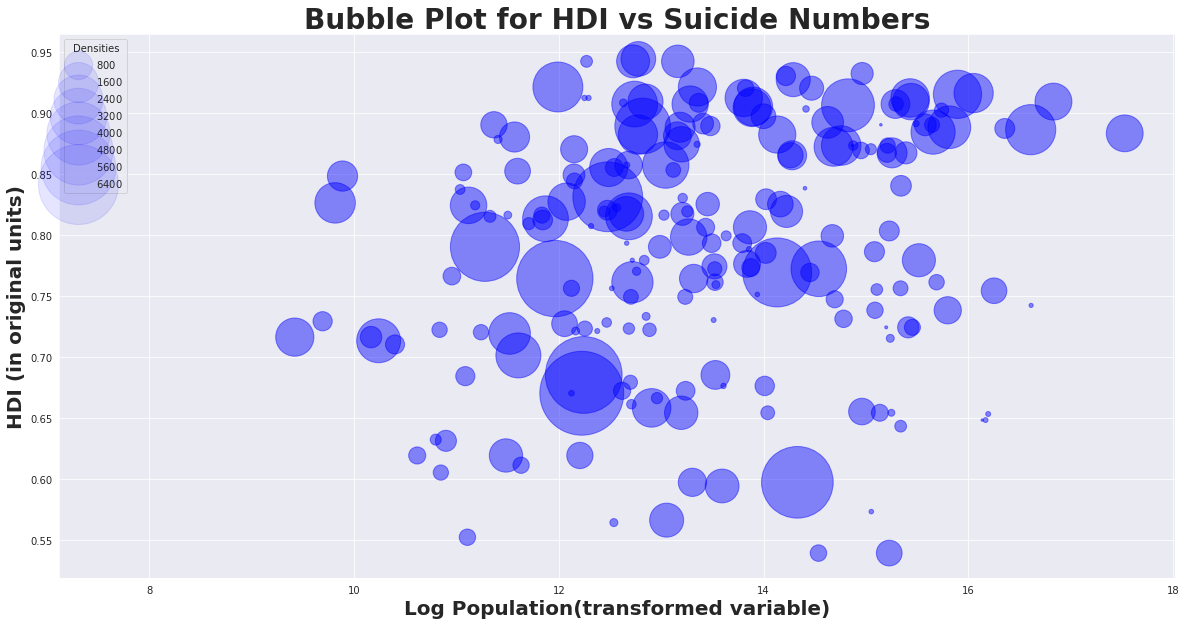

In [ ]:
df20=df.copy()
fig=plt.figure(figsize=(20, 10))
df20=df20.dropna(subset=['HDI for year']) #drop not a number nan values
df20 = df20.reindex(np.random.permutation(df20.index)) #randomising the dataframe, so that sampling can be done efficiently
df20 = df20.iloc[:250,:].copy() #sampling of data to avoid excessive data representation and redundancy
df20 = df20.reset_index(drop=True) #deletes old index instead of reinserting it in the dataframe in pandas

plt.title('Bubble Plot for HDI vs Suicide Numbers', fontsize=28, weight='bold') #title
plt.ylabel('HDI (in original units)', fontsize=20, weight='bold') # label for axes
x=np.log(df20['population']) #log transform
dens=df20['suicides/100k pop']  #weight of scatter plot points, depicts size of circles
ax=plt.scatter( x, y=df20['HDI for year'],s=dens*60, c='blue', alpha=.45)
plt.xlabel('Log Population(transformed variable)', fontsize=20, weight='bold')

handles, labels = ax.legend_elements(prop="sizes", c='blue',alpha=0.1)#obtaining data for legend
plt.legend(handles, labels,  loc="upper left", title="Densities")
plt.show()

The tranform used for the above bubble plot is taking the logarithm of the population(to avoid large number of data, often causing distorted data inferences). The **population was sampled**, and the bubble(scatter) plot was formed with weights as the suicides per 100 k population. A striking observation made is that ***greater number of suicides occur in countries with higher HDI***. A possible explanation for the observation could be that countries with higher HDI are generally developed countries, and the stress level in developed countries is usually higher than in undeveloped countries, pointing that the major cause of suicides is higher workload and stress levels in developed societies.